In [71]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Zadanie 1

Przygotuj i wyświetl wykres liniowy funkcji f(x) = 1/x dla x ϵ [1, 20]. Dodaj etykietę do linii wykresu i wyświetl legendę. Dodaj odpowiednie etykiety do osi wykresu (‘x’, ’f(x)’) oraz ustaw zakres dla obu osi na (0, 1) oraz (1, długość wektora x).

In [106]:
x = [i for i in range(1, 21)]
y = [1/i for i in x]

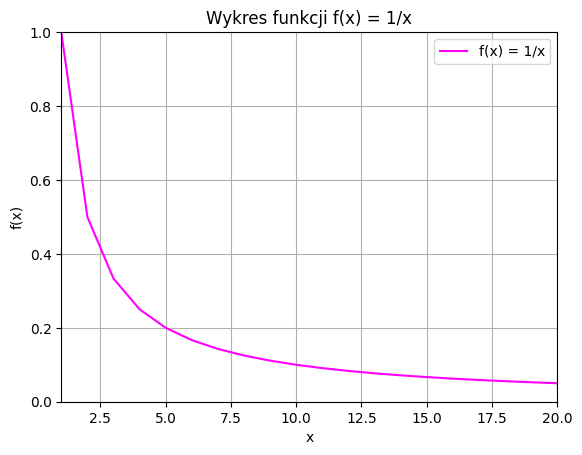

In [107]:
plt.plot(x, y, label='f(x) = 1/x', color='magenta')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.xlim(1, len(x))
plt.ylim(0, 1)

plt.legend()
plt.title('Wykres funkcji f(x) = 1/x')
plt.grid(True)
plt.show()

### Zadanie 2

Korzystając ze zbioru danych [zamowienia.csv](./data/zamowienia.csv) przygotuj i wyświetl dane w postaci wykresu liniowego z sumą zamówień dla każdego sprzedawcy z Polski w roku 2004 grupując po miesiącach (wzoruj się przykładzie z pkt. 3 tego labu). Każdy wykres to linia dla danego sprzedawcy, a oś x reprezentuje kolejne miesiące roku 2004. Pamiętaj o tym, że można iterować przez zgrupowaną ramkę danych pandas.

In [108]:
df = pd.read_csv('data/zamowienia.csv', sep=';')
df['Data zamowienia'] = pd.to_datetime(df['Data zamowienia'])

In [109]:
df_filtered = df[(df['Kraj'] == 'Polska') & (df['Data zamowienia'].dt.year == 2004)].copy()
df_filtered['Miesiac'] = df_filtered['Data zamowienia'].dt.month

grouped = df_filtered.groupby(['Sprzedawca', 'Miesiac'])['Utarg'].sum().round(1).reset_index()

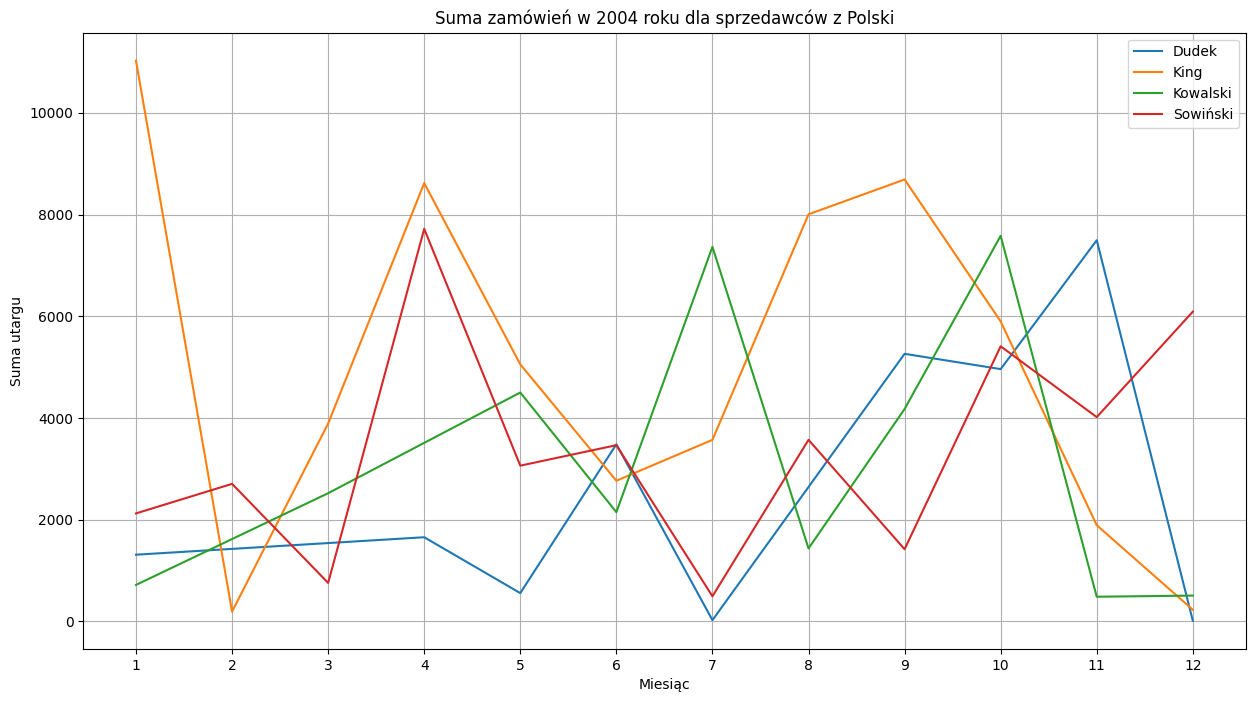

In [112]:
plt.figure(figsize=(15, 8))

for sprzedawca in grouped['Sprzedawca'].unique():
    dane = grouped[grouped['Sprzedawca'] == sprzedawca]
    plt.plot(dane['Miesiac'], dane['Utarg'], label=sprzedawca)

# 7. Dodatkowe ustawienia wykresu
plt.xlabel('Miesiąc')
plt.ylabel('Suma utargu')
plt.title('Suma zamówień w 2004 roku dla sprzedawców z Polski')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### Zadanie 3

Korzystając z biblioteki pandas wczytaj zbiór danych z [narodzinami dzieci](./data/imiona.xlsx) przygotuj poniższe wykresy:
#### * 3.1 - wykres słupkowy przedstawiający ilość narodzonych dziewczynek i chłopców w całym okresie.


Dodaj do wykresów stosowne etykiety. Poustawiaj różne kolory dla wykresów.

In [114]:
df = pd.read_excel('data/imiona.xlsx')
df

,Rok,Imie,Liczba,Plec
0,2000,JAKUB,14497,M
1,2000,MATEUSZ,11454,M
2,2000,KACPER,8898,M
3,2000,MICHAŁ,8498,M
4,2000,PATRYK,7743,M
...,...,...,...,...
16412,2017,TINA,5,K
16413,2017,VANESA,5,K
16414,2017,VERONIKA,5,K
16415,2017,WIERA,5,K


In [90]:
df_group = df.groupby(['Plec'])['Liczba'].sum()

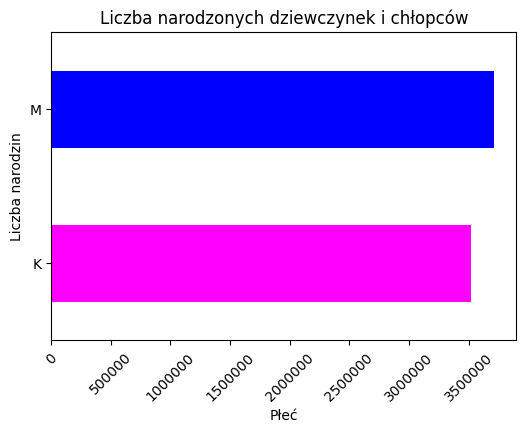

In [98]:
plt.figure(figsize=(6, 4))
df_group.plot(kind='barh', color=['magenta', 'blue'])

plt.title('Liczba narodzonych dziewczynek i chłopców')
plt.xlabel('Płeć')
plt.ylabel('Liczba narodzin')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

plt.show()

#### * 3.2 - wykres liniowy, gdzie będą dwie linie, jedna dla ilości urodzonych kobiet, druga dla mężczyzn dla każdego roku z osobna. Czyli y to ilość narodzonych kobiet lub mężczyzn (dwie linie), x to rok.

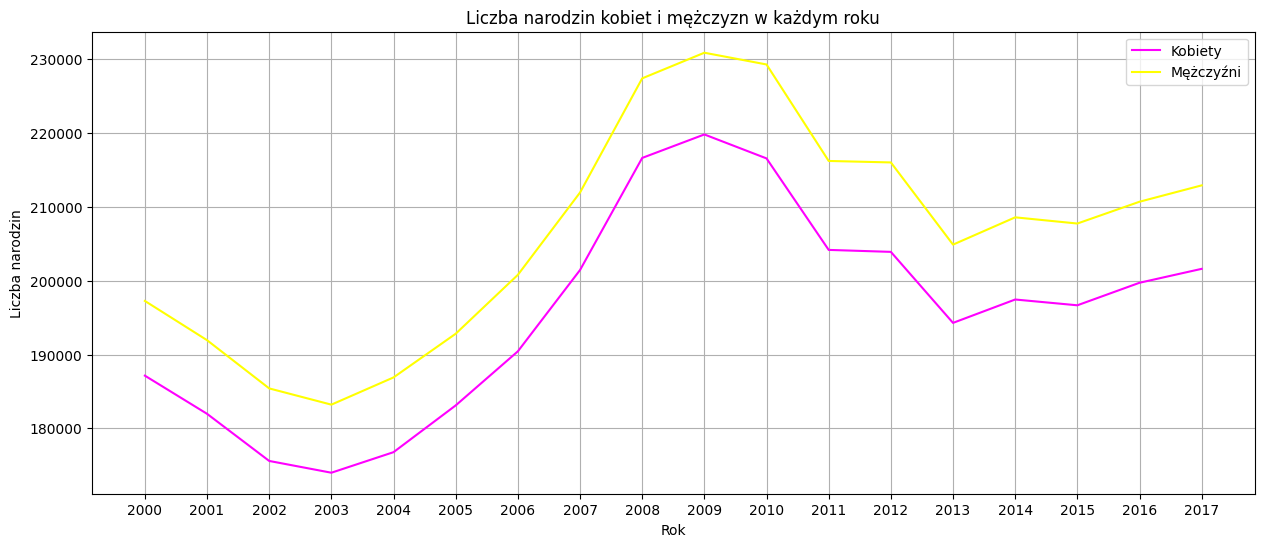

In [105]:
year_gender = df.groupby(['Rok', 'Plec'])['Liczba'].sum().unstack()

plt.figure(figsize=(15, 6))
plt.plot(year_gender.index, year_gender['K'], label='Kobiety', color='magenta')
plt.plot(year_gender.index, year_gender['M'], label='Mężczyźni', color='yellow')

plt.title('Liczba narodzin kobiet i mężczyzn w każdym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba narodzin')
plt.legend()
plt.grid(True)
plt.xticks(ticks=year_gender.index)
plt.show()


#### * 3.3 - wykres słupkowy przedstawiający sumę urodzonych dzieci w każdym roku.

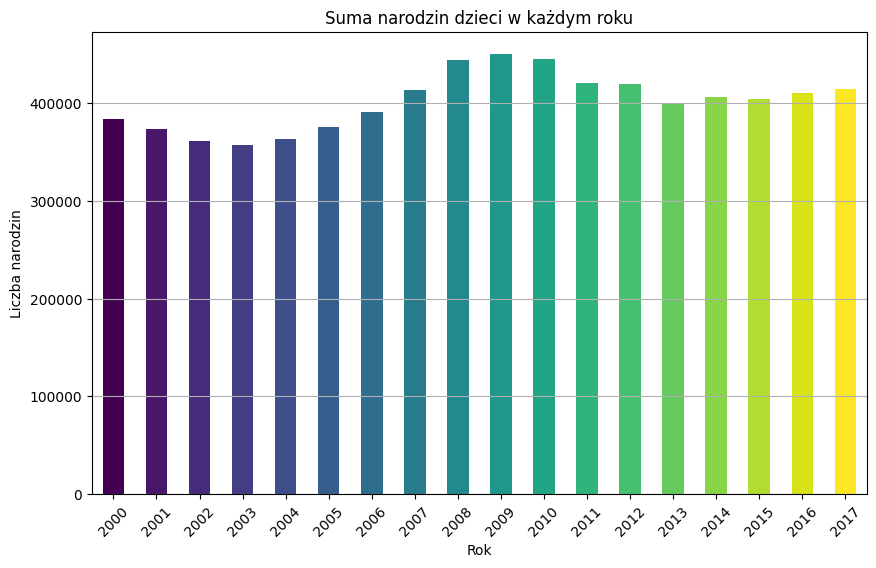

In [123]:
year_sum = df.groupby(['Rok'])['Liczba'].sum()

colors = plt.cm.viridis(np.linspace(0, 1, len(year_sum)))

plt.figure(figsize=(10, 6))

year_sum.plot(kind='bar', color=colors)

plt.title('Suma narodzin dzieci w każdym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba narodzin')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Zadanie 4

Korzystając ze zbioru danych Iris (https://archive.ics.uci.edu/ml/datasets/iris) wygeneruj wykres punktowy, gdzie wektor x to wartość `sepal length` a y to `sepal width`, dodaj paletę kolorów `c` na przykładzie listingu 7, a parametr `s` niech będzie wartością bezwzględną z różnicy wartości poszczególnych elementów wektorów x oraz y. Wykorzystaj bibliotekę pandas do przechowania datasetu.

In [185]:
df = pd.read_csv('../lab_04/iris.data')

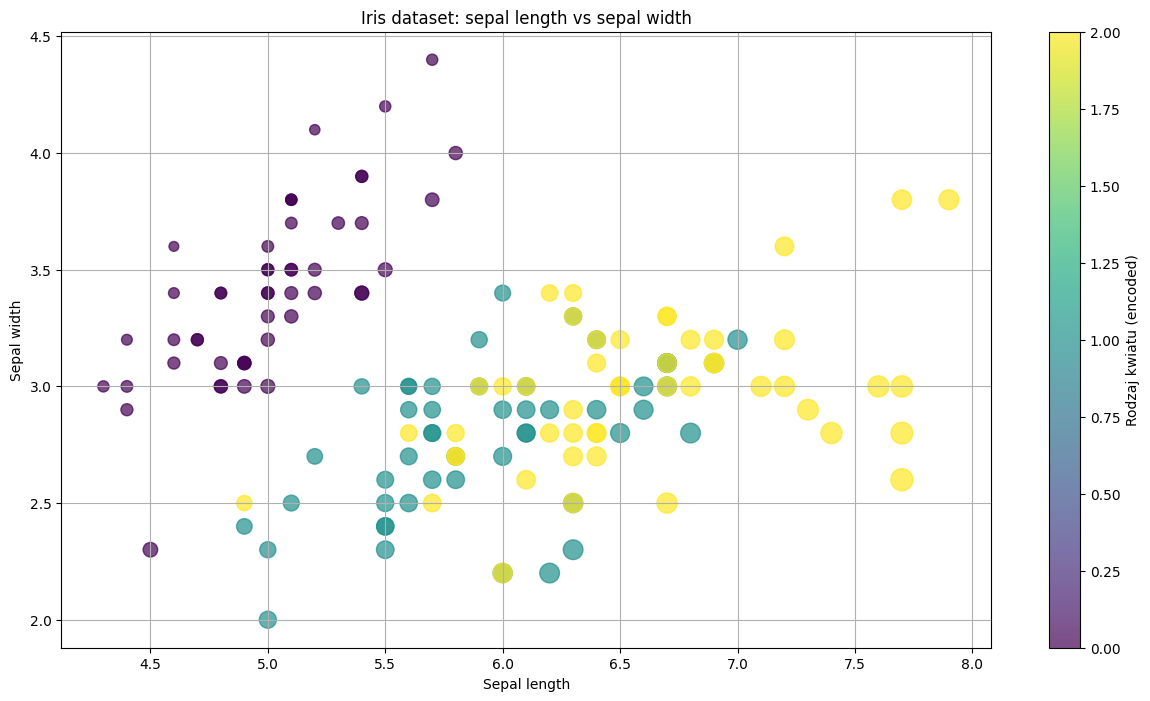

In [186]:
x = df['sepal length in cm']
y = df['sepal width in cm']

colors = pd.factorize(df['class'])[0]
sizes = np.abs(x - y) * 50

plt.figure(figsize=(15, 8))
plt.scatter(x, y, c=colors, s=sizes, cmap='viridis', alpha=0.7)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset: sepal length vs sepal width')
plt.colorbar(label='Rodzaj kwiatu (encoded)')
plt.grid(True)
plt.show()

### Zadanie 5

Korzystając z pliku [zamowienia.csv](./data/zamowienia.csv), policz sumy zamówień dla każdego sprzedawcy i wyświetl wykres kołowy z procentowym udziałem każdego sprzedawcy w ogólnej sumie zamówień. Poszukaj w Internecie jak dodać cień do takiego wykresu i jak działa atrybut `explode` tego wykresu. Wyświetl wykres podstawowy, z cieniem oraz z jednym elementem z aktywnym atrybutem `explode`.

In [187]:
df = pd.read_csv('data/zamowienia.csv', sep=';')

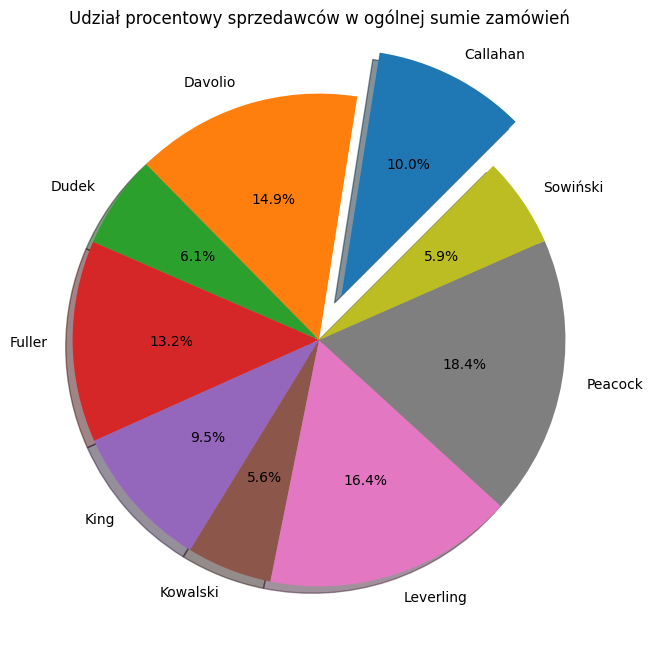

In [189]:
sales_sum = df.groupby('Sprzedawca')['Utarg'].sum()

explode = [0.2] + [0 for _ in range(len(sales_sum) - 1)]

plt.figure(figsize=(10, 8))
plt.pie(
    sales_sum,
    labels=sales_sum.index,
    autopct='%1.1f%%',
    shadow=True,
    explode=explode,
    startangle=45
)

plt.title('Udział procentowy sprzedawców w ogólnej sumie zamówień')
plt.show()

### Zadanie 6

Korzystając z galerii matplotlib i [przykładu](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html#sphx-glr-gallery-misc-packed-bubbles-py) postaraj się umieścić analogicznie 10 najbardziej ludnych krajów na świecie w roku 2017 korzystając z danych w pliku [ludność](./data/ludnosc.xlsx).

In [190]:
df = pd.read_excel('data/ludnosc.xlsx')

In [191]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

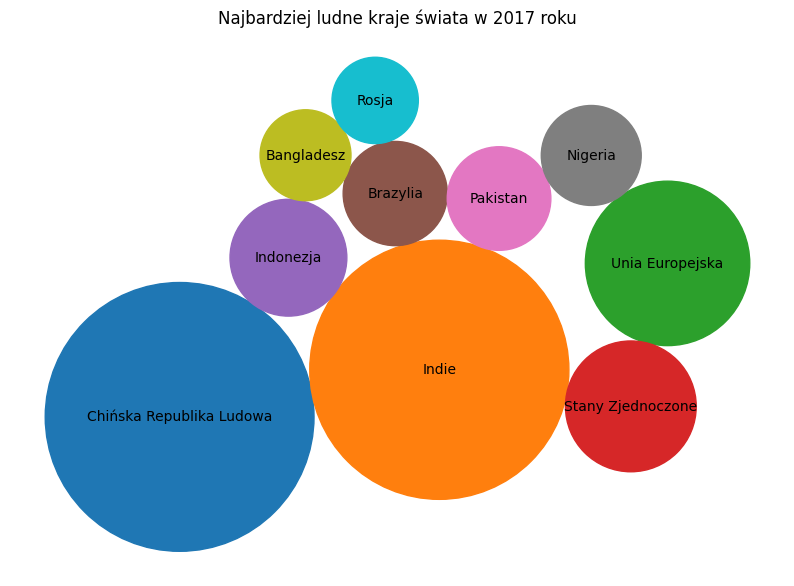

In [192]:
kraje = df['Kraj'].iloc[:10]
populacja = df[2017].iloc[:10]

bubble_chart = BubbleChart(area=populacja, bubble_spacing=0.1)

# 4. Uruchamiamy kompresję bąbelków
bubble_chart.collapse()

# 5. Rysowanie wykresu
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, kraje, colors=plt.cm.tab10(np.linspace(0, 1, len(kraje))))  # kolorujemy np. tab10

ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Najbardziej ludne kraje świata w 2017 roku')

plt.show()